# Clustering_Users-Products

The below code performs the following tasks :



1. Generates Purchase information of Users ranging from 0 to 999 for Products ranging from 0 to 9999
2.  Writes the generated data into a csv file.

1.  Preforms clustering on the data points and classifies the Purchases in to 8 categories.
 
             *  K-Means Clustering
             *  Hierarchical Clustering (Agglomerative)
             
             








In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generating Data and Saving into csv

In [0]:
import numpy as np
import random

users = range(1000)
products = range(10000)
purchases = []

for p in range(100000):
  U = random.choice(users)
  P = random.choice(products)
  purchases.append((U,P))

  
#converting Purchases in to a 2D numpy array  
purchases = np.asarray(purchases)


# Saving the numpy array in to a csv file
np.savetxt('drive/My Drive/SocioGraphSolutions/Purchases.csv',purchases,delimiter = ',', header = 'Users,Products', fmt='%d')  

# Clustering

In [0]:
#importing the dataset

import pandas as pd
dataset = pd.read_csv('drive/My Drive/SocioGraphSolutions/Purchases.csv')
dataset

# converting dataframe to numpy arrayn and storing to a new variable
purchases = np.asarray(dataset)  

## K-Means Clustering

In [0]:
# Importing the KMeans class
from sklearn.cluster import KMeans     


# initializing the K-Means 
km = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 20,algorithm = 'elkan')

# Predicting the clusters of each purchase
y_kmeans = km.fit_predict(purchases)

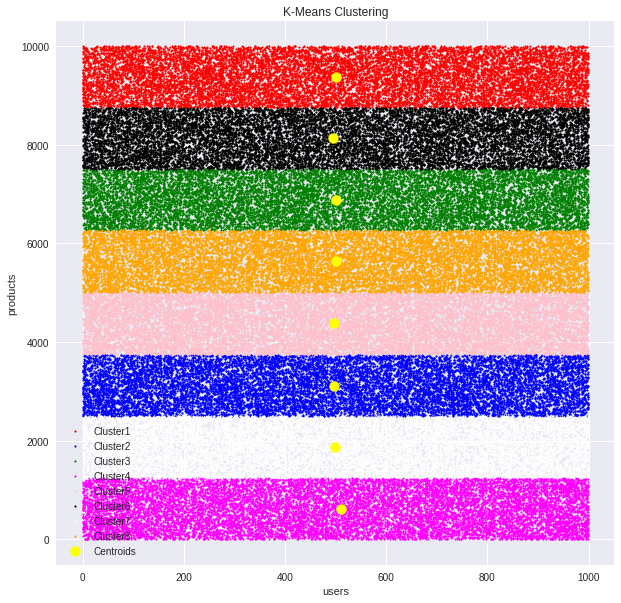

In [5]:
# Importing the pyplot library
import matplotlib.pyplot as plt


# Ploting the clusters in a graph
plt.figure(figsize = (10,10))
plt.scatter(purchases[y_kmeans == 0, 0] ,purchases[y_kmeans == 0, 1] ,c='red',s=3,label = 'Cluster1')
plt.scatter(purchases[y_kmeans == 1, 0] ,purchases[y_kmeans == 1, 1] ,c='blue',s=3,label = 'Cluster2')
plt.scatter(purchases[y_kmeans == 2, 0] ,purchases[y_kmeans == 2, 1] ,c='green',s=3,label = 'Cluster3')
plt.scatter(purchases[y_kmeans == 3, 0] ,purchases[y_kmeans == 3, 1] ,c='magenta',s=3,label = 'Cluster4')
plt.scatter(purchases[y_kmeans == 4, 0] ,purchases[y_kmeans == 4, 1] ,c='pink',s=3,label = 'Cluster5')
plt.scatter(purchases[y_kmeans == 5, 0] ,purchases[y_kmeans == 5, 1] ,c='black',s=3,label = 'Cluster6')
plt.scatter(purchases[y_kmeans == 6, 0] ,purchases[y_kmeans == 6, 1] ,c='white',s=3,label = 'Cluster7')
plt.scatter(purchases[y_kmeans == 7, 0] ,purchases[y_kmeans == 7, 1] ,c='orange',s=3,label = 'Cluster8')

# plotting the centroid of each cluster
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100, c = 'yellow', label = 'Centroids')

plt.title('K-Means Clustering')
plt.xlabel('users')
plt.ylabel('products')
plt.legend(loc='lower left')
plt.show()

### Optimum Number of Clusters



---


**The Elbow Method**


The Elbow Method can be used to determine the optimum number of clusters for a given clustering problem.

The method usees With-in Cluster Sum of Squares(WCSS) as metrics to form clusters.The WCSS is the sum of the squares of the distances between the datapoints in a cluster.A graph is plotted between WCSS and the number of clusters. The cluster after which the WCSS shows no more significant decrease is chosen as the optimum number of clusters.


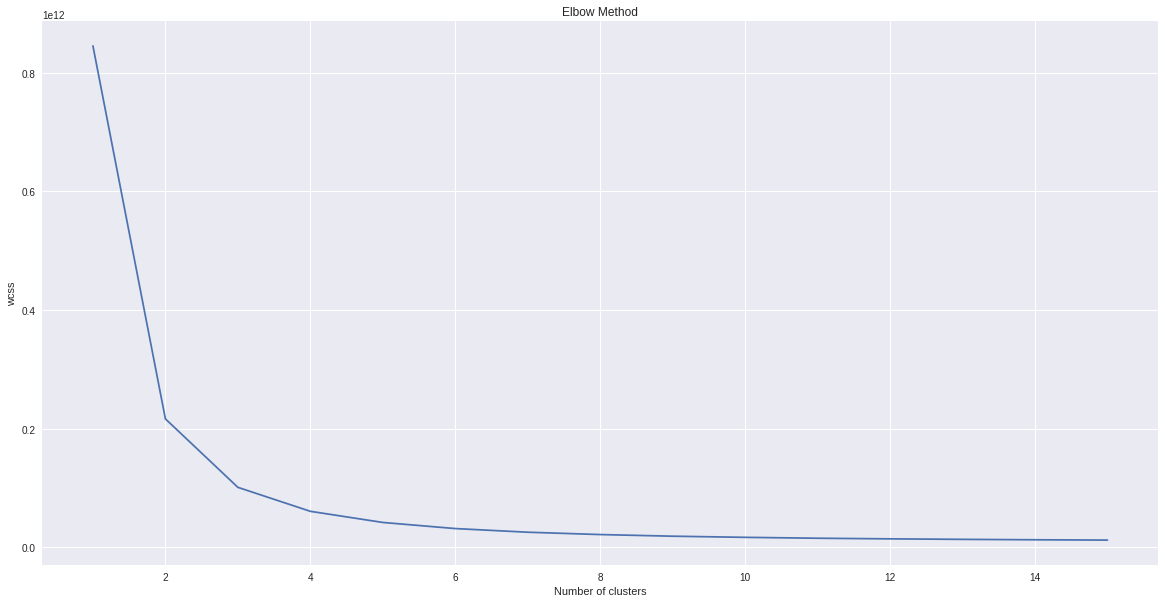

In [6]:

wcss = []    # with-in cluster sum of squares (for Elboew Method to identify optimum number of clusters)


# Calculating wcss for up to 15 clusters
for i in range(1,16):
  km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, algorithm = 'elkan')
  km.fit(purchases)
  wcss.append(km.inertia_)
  
  
#plotting the Elbow graph  
plt.figure(figsize = (20,10))
plt.plot(range(1,16),wcss)  
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()



**Conclusion**

From the above graph we can see that:

After the 4th cluster the decrease in wcss are lesser compared to the preceeding clusters.
Hence the Elbow method suggests that 4 or 5 can be the optimum number of clusters for the given problem.

## Hierarchical Clustering (Agglomerative)

In [0]:
# Reducing the number of observations to 10000 
purchases = purchases[:10000,:]

In [0]:
# Importing AgglomerativeClustering class
from sklearn.cluster import AgglomerativeClustering

# Initializing the AgglomerativeClustering algorithm
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')   #“ward”, “complete”, “average”, “single”

# Predicting the cluster for each Purchase
y_hc = hc.fit_predict(purchases)

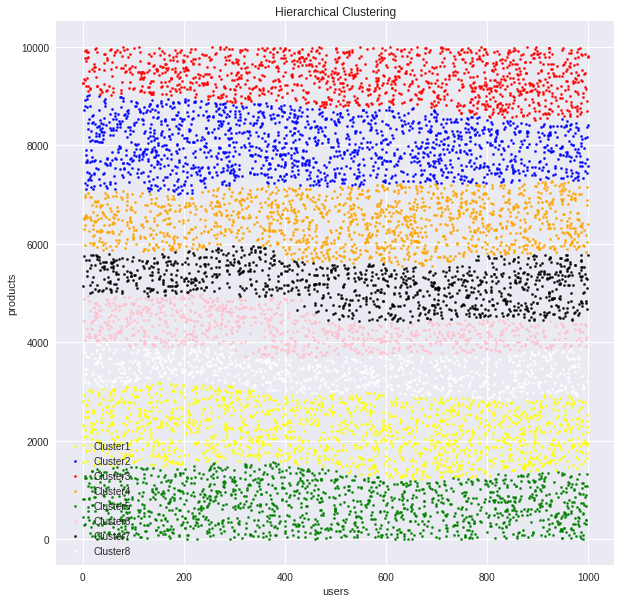

In [9]:
#Plotting the clusters

plt.figure(figsize=(10, 10))
plt.scatter(purchases[y_hc == 0, 0] ,purchases[y_hc == 0, 1] ,c='yellow',s=5,label = 'Cluster1')
plt.scatter(purchases[y_hc == 1, 0] ,purchases[y_hc == 1, 1] ,c='blue',s=5,label = 'Cluster2')
plt.scatter(purchases[y_hc == 2, 0] ,purchases[y_hc == 2, 1] ,c='red',s=5,label = 'Cluster3')
plt.scatter(purchases[y_hc == 3, 0] ,purchases[y_hc == 3, 1] ,c='orange',s=5,label = 'Cluster4')
plt.scatter(purchases[y_hc == 4, 0] ,purchases[y_hc == 4, 1] ,c='green',s=5,label = 'Cluster5')
plt.scatter(purchases[y_hc == 5, 0] ,purchases[y_hc == 5, 1] ,c='pink',s=5,label = 'Cluster6')
plt.scatter(purchases[y_hc == 6, 0] ,purchases[y_hc == 6, 1] ,c='black',s=5,label = 'Cluster7')
plt.scatter(purchases[y_hc == 7, 0] ,purchases[y_hc == 7, 1] ,c='white',s=5,label = 'Cluster8')

plt.title('Hierarchical Clustering')
plt.xlabel('users')
plt.ylabel('products')
plt.legend(loc='lower left')
plt.show()

### Optimum Number of Clusters

**Dendrogram**

Dendrogram represents the cluster in a tree diagram.Dendrogram can be used to determine the optimum number of clusters in Hierarchical Clustering.

A threshold distance is chosen and a horizontal line is drawn at the threshold. The optimum number of clusters are the number of vertical lines the the threshold line crosses. 

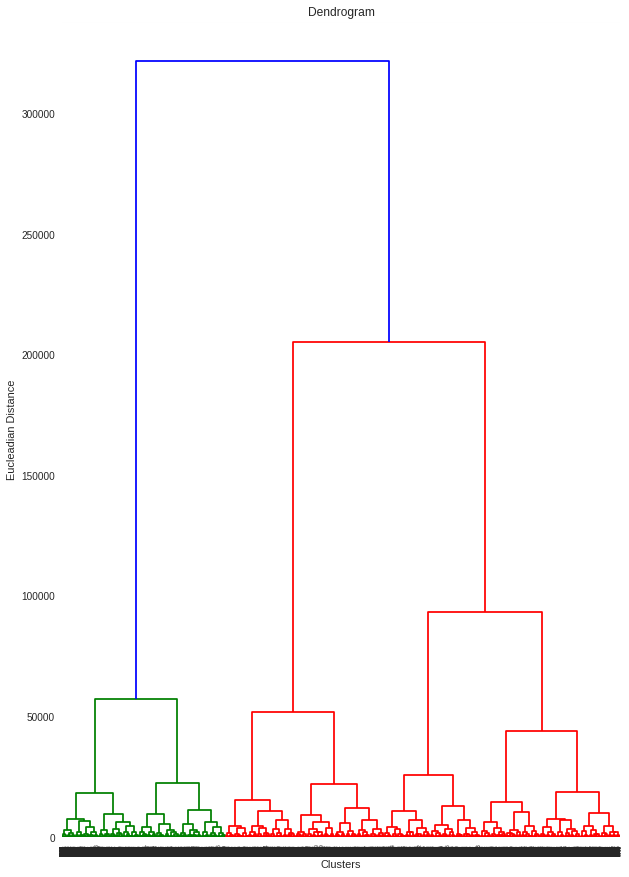

In [10]:
#plotting the dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,15))

dendrogram = sch.dendrogram(sch.linkage(purchases, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Eucleadian Distance')
plt.show()

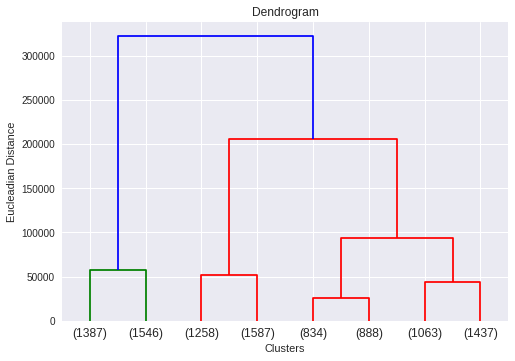

In [11]:
# Truncating the dendrogram up to 8 final clusters

dendrogram = sch.dendrogram(sch.linkage(purchases, method = 'ward'), truncate_mode='lastp',p = 8)

plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Eucleadian Distance')
plt.show()